# Importation des données

In [2]:
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, Aer
from qiskit.tools.visualization import plot_bloch_vector, plot_histogram
# from qiskit.quantum_info.random.utils import random_state
from qiskit.quantum_info import random_statevector as random_state
# from qiskit.tools import parallel
from qiskit.tools import parallel
import numpy as np
import itertools

### Création de l'état de Dirac et de simulation

In [4]:
# Defining the unitary simulator
unit_simulator = Aer.get_backend('unitary_simulator')
# Defining the statevector simulator
state_simulator = Aer.get_backend('statevector_simulator')
# Defining the assembly simulator
qasm_simulator = Aer.get_backend('qasm_simulator')

# Function: state_to_dirac(quantum_state)
###
#This function accepts an arbitrary state vector and prints it in its␣
#,→corresponding Dirac notation
def state_to_dirac(state):
# Number of qubits (often denoted with small n)
    n = int(np.log2(state.size))
# Number of complex probability amplitudes (often denoted with capital N)
    N = state.size
    return ' '.join('{:+.4f}|{:0{n:d}b}>'.format(a.item(), i, n=n)
    for a, i in zip(state, itertools.count()) if not np.isclose(a.item(), 0.0))
# Function: simulate_circuit_and_obtain_vector(quantum_circuit, number_shots)
###
#This function accepts an arbitrary circuit, performs its state vector␣
#,→simulation and
# returns the resulting vector state as a [x, y, z] vector that could be plotted
def simulate_circuit_and_obtain_vector(qc, trials = 100000):
# Execute the state vector simulation
    result = execute(qc, state_simulator).result().get_statevector(qc)
# Obtain the Bloch sphere representation of the resulting vector state
    bloch_state = state_to_bloch_vector(result, trials)
# Convert the resulting state vector in its Dirac notation
    dirac_vector = state_to_dirac(result)
    return bloch_state, dirac_vector

# Exercice 1, question 2

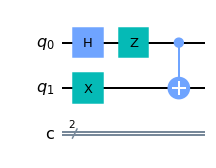

In [8]:
import numpy as np
from qiskit import QuantumCircuit, transpile
from qiskit.providers.aer import QasmSimulator
from qiskit.visualization import plot_histogram

# Use Aer's qasm_simulator
simulator = QasmSimulator()

# Create a Quantum Circuit acting on the q register
circuit = QuantumCircuit(2, 2)

# Add a H and Z gate on qubit 0
circuit.h(0)
circuit.z(0)

#Add a X gate on qubit 1
circuit.x(1)
# Add a CX (CNOT) gate on control qubit 0 and target qubit 1
circuit.cx(0, 1)


# compile the circuit down to low-level QASM instructions
# supported by the backend (not needed for simple circuits)
compiled_circuit = transpile(circuit, simulator)

# Execute the circuit on the qasm simulator
job = simulator.run(compiled_circuit, shots=1000)


# Draw the circuit
circuit.draw(output='mpl')